## 2. Naive Model 


In [18]:
#Packages 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import import_ipynb
from feature_engineering import scaler_y
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [10]:
# Data Import 

# Load X_train
with open("data/X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

# Load y_train
with open("data/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

# Load X_val
with open("data/X_val.pkl", "rb") as f:
    X_val = pickle.load(f)

# Load y_val
with open("data/y_val.pkl", "rb") as f:
    y_val = pickle.load(f)

# Load X_test
with open("data/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

# Load y_test
with open("data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

In [3]:
#Data Load df_final_viz
with open("data/df_final_viz.pkl", "rb") as f:
    df_final = pickle.load(f)

In [19]:
# Seasonal naive für Test Data
seasonal_lag = 7*24 #lag of one week 
y_test = pd.DataFrame(y_test, columns=['actuals'])
y_test["predictions"] = y_test["actuals"].shift(seasonal_lag)
y_test=y_test.iloc[168:]

rmse = np.sqrt(mean_squared_error(y_test["actuals"], y_test["predictions"]))
mse = mean_squared_error(y_test["actuals"], y_test["predictions"])
print(f"Scaled Test MSE: {mse}, Scaled Test RMSE: {rmse}")

y_test['actuals'] = scaler_y.inverse_transform(y_test['actuals'].values.reshape(-1, 1))
y_test['predictions'] = scaler_y.inverse_transform(y_test['predictions'].values.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(y_test["actuals"], y_test["predictions"]))
mse = mean_squared_error(y_test["actuals"], y_test["predictions"])
print(f"Orignal Test MSE: {mse}, Original Test RMSE: {rmse}")



Scaled Test MSE: 0.0029150420171998896, Scaled Test RMSE: 0.05399112906024368
Orignal Test MSE: 33.6681549137931, Original Test RMSE: 5.802426640104389


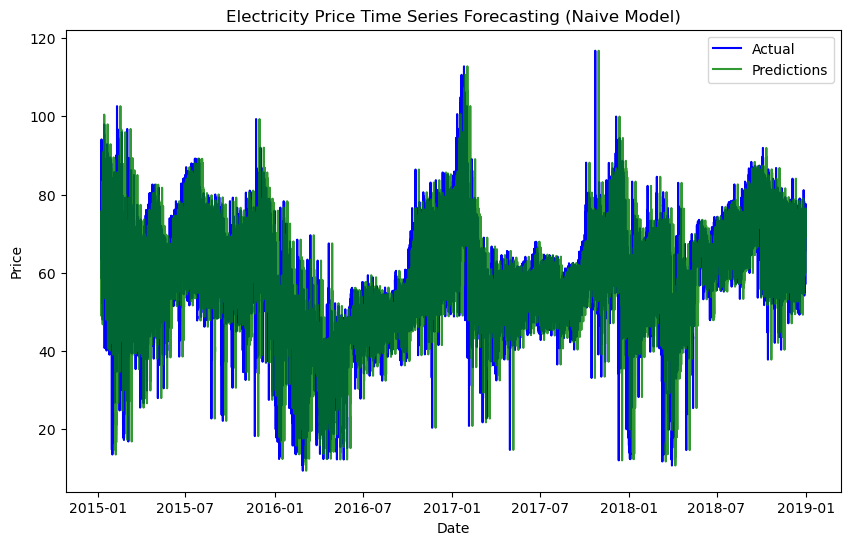

In [15]:
# Seasonal naive für gesamten Datensatz (zum Plotten)
seasonal_lag = 7*24 #lag of one week 
target = pd.DataFrame(df_final, columns=['price actual'])
target["predictions"] = target["price actual"].shift(seasonal_lag)


target=target.iloc[168:]

# Plot of the forecast
plt.figure(figsize=(10, 6))

# Plot of actual values
plt.plot(target['price actual'], label='Actual', color='blue')

# Plot of training forecast
plt.plot(target["predictions"], label='Predictions', color='green', alpha=0.8)

plt.title('Electricity Price Time Series Forecasting (Naive Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()